# I'm not a robot, i'm an AI

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2

# Analisando o alfabeto das respostas

In [3]:
import os 
import re   

diretorio = '../../datasets/captcha_images/'

lista_arquivos = os.listdir(diretorio)

outputs = []

for arquivo in lista_arquivos:
    arquivo = arquivo.replace('.png', '')
    arquivo = arquivo.replace('.jpg', '')
    numeros = re.findall(r'\d+', arquivo)


    # Convertendo a lista de números em uma string concatenada
    resultado = ''.join(numeros)
    outputs.append(resultado)


string_concatenada = ''.join(outputs)
string_concatenada

# Usando um conjunto (set) para encontrar os valores únicos
unicos = set(string_concatenada)

# Determinando os valores únicos de 0 a 9
numeros_unicos = {str(i) for i in range(10)}  # Criando um set de '0' a '9'
valores_unicos = unicos.intersection(numeros_unicos)
valores_unicos

{'2', '3', '4', '5', '6', '7', '8'}

In [96]:
import os

# Diretório onde estão as imagens
diretorio = '../../datasets/captcha_images/'

# Lista de arquivos no diretório
lista_arquivos = os.listdir(diretorio)

outputs = []

# Processa os nomes dos arquivos, removendo as extensões e armazenando em 'outputs'
for arquivo in lista_arquivos:
    arquivo = arquivo.replace('.png', '').replace('.jpg', '')
    outputs.append(list(arquivo))

# Verificar o tamanho esperado (pode ser o tamanho da primeira entrada, por exemplo)
tamanho_esperado = len(outputs[0])

# Encontrar as entradas que não têm o tamanho esperado
irregulares = [(i, entrada, len(entrada)) for i, entrada in enumerate(outputs) if len(entrada) != tamanho_esperado]

# Exibir os resultados
print(f"Tamanho esperado: {tamanho_esperado}")
print(f"Total de entradas irregulares: {len(irregulares)}")

# Exibir as entradas irregulares com seus tamanhos
for i, entrada, tamanho in irregulares:
    print(f"Índice: {i}, Entrada: {''.join(entrada)}, Tamanho: {tamanho}")

Tamanho esperado: 5
Total de entradas irregulares: 1
Índice: 923, Entrada: samples, Tamanho: 7


In [ ]:
import os 
import re   

diretorio = '../../datasets/captcha_images/'

lista_arquivos = os.listdir(diretorio)

outputs = []

for arquivo in lista_arquivos:
    arquivo = arquivo.replace('.png', '')
    arquivo = arquivo.replace('.jpg', '')
    numeros = re.findall(r'\d+', arquivo)


    # Convertendo a lista de números em uma string concatenada
    resultado = ''.join(numeros)
    outputs.append(resultado)


string_concatenada = ''.join(outputs)
string_concatenada

# Usando um conjunto (set) para encontrar os valores únicos
unicos = set(string_concatenada)

# Determinando os valores únicos de 0 a 9
numeros_unicos = {str(i) for i in range(10)}  # Criando um set de '0' a '9'
valores_unicos = unicos.intersection(numeros_unicos)
valores_unicos

In [ ]:
import re

outputs = []

for arquivo in lista_arquivos:
    arquivo = arquivo.replace('.png', '')
    letras = re.findall(r'[a-zA-Z]+', arquivo)
    resultado = ''.join(letras)
    outputs.append(resultado)

string_concatenada = ''.join(outputs)
string_concatenada


unicos = set(string_concatenada)

alfabeto = set('abcdefghijklmnopqrstuvwxyz')

valores_unicos = unicos.intersection(alfabeto)
valores_unicos

# Estruturando os dados 

In [4]:
import os    

diretorio = '../../datasets/captcha_images/'

lista_arquivos = os.listdir(diretorio)

outputs = []

x = []

for arquivo in lista_arquivos:
    resposta = arquivo.replace('.png', '').replace('.jpg', '')
    outputs.append(list(resposta))
    x.append(cv2.imread(f'{diretorio}{arquivo}'))

x_sem_Proce = np.array(x)
x_sem_Proce.shape
#tf.keras.utils.to_categorical(outputs)

(1070, 50, 200, 3)

23 caracteres unicos no total

In [5]:
chaves = {
    'a': 1, 'b': 2, 'c': 3, 'd': 4,
    'e': 5, 'f': 6, 'g': 7, 'j': 8,
    'l': 9, 'm': 10, 'n': 11, 'p': 12,
    's': 13, 'w': 14, 'x': 15, 'y': 16,
    '2': 17, '3': 18, '4': 19, '5': 20,
    '6': 21, '7': 22, '8': 23
}



# Substituindo diretamente usando o dicionário
resultado = []
for arr in outputs:
    resultados = [str(chaves.get(s, s)) for s in arr]
    resultado.append(resultados)

# Convertendo strings para inteiros
res = [[int(elemento) for elemento in linha] for linha in resultado]

# Subtraindo 1 de cada valor para ajustar ao formato do one-hot encoding (que começa no zero)
res_ajustado = [[elemento - 1 for elemento in linha] for linha in res]

# Aplicando one-hot encoding para cada elemento em 'res_ajustado' com 23 classes
res_one_hot = [[tf.keras.utils.to_categorical(elemento, num_classes=23) for elemento in linha] for linha in res_ajustado]

# Convertendo para tensor tridimensional
res_one_hot_np = np.array(res_one_hot)

# Verificando o shape da matriz resultante
print(f"Shape da matriz one-hot codificada: {res_one_hot_np.shape}")

y = res_one_hot_np.reshape(1070, 5*23)

Shape da matriz one-hot codificada: (1070, 5, 23)


In [6]:
x_sem_Proce.shape, y.shape

((1070, 50, 200, 3), (1070, 115))

# Realizando processamento de imagem 

Text(0.5, 1.0, 'Gaussian 5_0')

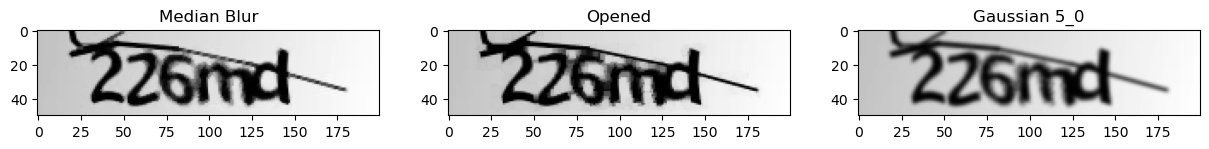

In [68]:
imagem_cinza = cv2.cvtColor(x_sem_Proce[0].copy(), cv2.COLOR_BGR2GRAY)

median_blur = cv2.medianBlur(imagem_cinza, 3)
opened = cv2.morphologyEx(imagem_cinza.copy(), cv2.MORPH_OPEN, None)
gaussian3_0 = cv2.GaussianBlur(imagem_cinza, (5,5),0)

plt.figure(figsize=(15, 3))  # Define o tamanho da figura

plt.subplot(1, 3, 1)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Blur")

plt.subplot(1, 3, 2)
plt.imshow(opened,  cmap='gray')
plt.title("Opened")

plt.subplot(1, 3, 3)
plt.imshow(gaussian3_0,  cmap='gray')
plt.title("Gaussian 5_0")


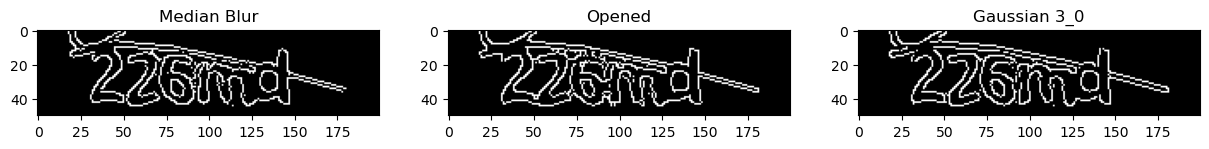

In [47]:
# Calculando os filtros de canny com diferentes limiares(Thresholds) para imagem sem o filtro gaussiano
canny_median = cv2.Canny(median_blur,70, 140)
canny_opened = cv2.Canny(opened,70, 140)
canny_gaussian = cv2.Canny(gaussian3_0,70, 140)

plt.figure(figsize=(15, 3))  # Define o tamanho da figura

plt.subplot(1, 3, 1)
plt.imshow(canny_median, cmap='gray')
plt.title("Median Blur")

plt.subplot(1, 3, 2)
plt.imshow(canny_opened,  cmap='gray')
plt.title("Opened")

plt.subplot(1, 3, 3)
plt.imshow(canny_gaussian,  cmap='gray')
plt.title("Gaussian 3_0")

plt.show()

O método de filtragem Gaussian Blur aparentou menos ruído na hora da detecção de bordas, então será este método que usaremos para pré processar as imagens antes de inseri-las no modelo

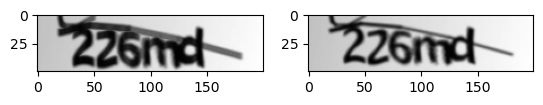

In [62]:
enroded = cv2.erode(src=gaussian3_0.copy(), # Imagem a ser passada
                    kernel=(3,3), # Tamanho do kernel
                    iterations=3) # Numero de vezes que a erosão é aplicada

plt.subplot(1,2,1)
plt.imshow(enroded, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(gaussian3_0, cmap='gray')

Podemos testar a erosão após esses processos também

In [7]:
x = []
for i, img in enumerate(x_sem_Proce):
    imagem_cinza = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    x.append(cv2.GaussianBlur(imagem_cinza, (5,5),0))
    
x = np.array(x)
x = x.reshape(1070, 50, 200,1)
x = x/255 # Normalizando os dados entre 0 e 1
x.shape

(1070, 50, 200, 1)

In [13]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=12)

# Treinamento da CNN

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta

#Criando modelo de rede neural e adicionando as camadas
modelo = Sequential()

#Usar o padding é same, nao usar é valid
# kernel_size é o tamanho do filtro
# pool_size é o tamanho do quadrante que o pooling ira escolher o valor maximo
modelo.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(50,200,1)))
modelo.add(AveragePooling2D(pool_size=(2,2), padding='valid'))

modelo.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
modelo.add(AveragePooling2D(pool_size=(2,2), padding='valid'))

modelo.add(Flatten())

modelo.add(Dense(712, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(0.2))

#Adicionando camada densa recebendo 1.024 entradas
modelo.add(Dense(84, activation='relu', kernel_initializer='normal'))
modelo.add(Dropout(0.2))

#Adicionando camada de saída
modelo.add(Dense(y_treino.shape[1], activation='sigmoid', kernel_initializer='normal'))


In [18]:
otimizador = Adam() # Otimizador Adam

modelo.compile(loss='categorical_crossentropy', 
               optimizer=otimizador, 
               metrics=['acc'], ) 

In [19]:
historico = modelo.fit(x_treino, y_treino, epochs=16, batch_size=100, verbose=1, validation_data=(x_teste, y_teste))

Epoch 1/16
9/9 [==============================] - 3s 214ms/step - loss: 99.5836 - acc: 0.0093 - val_loss: 222.0701 - val_acc: 0.0000e+00
Epoch 2/16
9/9 [==============================] - 1s 73ms/step - loss: 1705.5072 - acc: 0.0058 - val_loss: 2654.7273 - val_acc: 0.0000e+00
Epoch 3/16
9/9 [==============================] - 1s 73ms/step - loss: 12874.8623 - acc: 0.0070 - val_loss: 13102.1895 - val_acc: 0.0000e+00
Epoch 4/16
9/9 [==============================] - 1s 73ms/step - loss: 66167.4219 - acc: 0.0117 - val_loss: 69677.2812 - val_acc: 0.0000e+00
Epoch 5/16
9/9 [==============================] - 1s 73ms/step - loss: 245608.5781 - acc: 0.0129 - val_loss: 183037.3906 - val_acc: 0.0000e+00
Epoch 6/16
9/9 [==============================] - 1s 73ms/step - loss: 754937.1250 - acc: 0.0105 - val_loss: 516551.1875 - val_acc: 0.0000e+00
Epoch 7/16
9/9 [==============================] - 1s 73ms/step - loss: 1950343.7500 - acc: 0.0105 - val_loss: 1334064.7500 - val_acc: 0.0000e+00
Epoch 8/16
